In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
Image.LOAD_TRUNCATED_IMAGES = True
from imageio import imread,imwrite
from datetime import datetime
import shutil
import skimage
import cv2
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix


from keras.models import model_from_json
import keras
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,Conv3D,Conv2DTranspose,MaxPooling2D
from keras import backend as K
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.initializers import RandomNormal
from keras.initializers import he_normal
from keras.applications import vgg16 as vgg
from keras.applications.resnet50 import ResNet50
from keras.optimizers import adam
from keras import optimizers
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout,concatenate
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
pristine_path = "./dataset-dist/phase-01/training/pristine/"
fake_path  = "./dataset-dist/phase-01/training/fake/"
mask_path = "./dataset-dist/phase-01/training/maskfiles/"
path ='./dataset-dist/phase-01/training/'

In [3]:
pristine_files = os.listdir(pristine_path)
fake_files = os.listdir(fake_path)
mask_files = os.listdir(mask_path)

In [4]:
defect_imgs = [
'aa3b4f7caf9de8c1d6551c33045fb4c1.png',
'b0060704d02f1229b75cbd550c7267b4.png',
'bc04da26ab41ce92565dd3c686dae6c8.png',
'cc263a4c9ff9943acbb9049f637a0bed.png',
'd4aff0ad5f4f99fc6cad4243b926eda7.png',
'd9b9f5db7d29a3855cceef574145b595.png',
'ca472f184807aded538221ac0b5ac27b.png',
'bb7ed6b43f565a1fe2ebcbf99886d1d4.png']
defect_imgs_mask = [
'aa3b4f7caf9de8c1d6551c33045fb4c1.mask.png',
'b0060704d02f1229b75cbd550c7267b4.mask.png',
'bc04da26ab41ce92565dd3c686dae6c8.mask.png',
'cc263a4c9ff9943acbb9049f637a0bed.mask.png',
'd4aff0ad5f4f99fc6cad4243b926eda7.mask.png',
'd9b9f5db7d29a3855cceef574145b595.mask.png',
'ca472f184807aded538221ac0b5ac27b.mask.png',
'bb7ed6b43f565a1fe2ebcbf99886d1d4.mask.png']

In [5]:

start = datetime.now()

if not os.path.isdir(path + 'fake_256/'):
    os.mkdir(path + 'fake_256/')
    for file in fake_files:
        if file in defect_imgs or file == '.DS_Store':
            continue
        img = Image.open(fake_path + file)
        img = img.resize((256, 256))
        # Printing after conversion

        print (
            'Shape : ',
            img.size,
            'Mode : ',
            img.mode,
            'file : ',
            file,
            )
        img.save(path + 'fake_256/' + file)
else:
    print('The files were present in the folder')

print ('Time taken to run this cell :', datetime.now() - start)


Shape :  (256, 256) Mode :  RGBA file :  a768fceead79102801131160d76dc08b.png
Shape :  (256, 256) Mode :  RGBA file :  ac5c61568bbb4f1a965803c6e85481ed.png
Shape :  (256, 256) Mode :  RGB file :  b8cecf240477353bdf87aac6521e066f.png
Shape :  (256, 256) Mode :  RGB file :  35458ca671876a5bad7f87419fe53b4c.png
Shape :  (256, 256) Mode :  RGB file :  a20985daaeef78ec36b75a820360ee7e.png
Shape :  (256, 256) Mode :  RGB file :  d402dcd0cbd09bcc950a22003b8251b4.png
Shape :  (256, 256) Mode :  RGB file :  e7b762a90a95ff8d71497a6da103f649.png
Shape :  (256, 256) Mode :  RGB file :  e3137a7b21d07b4daa8a23cf778cc083.png
Shape :  (256, 256) Mode :  RGB file :  707642c1c1a36f8fb28274f2484b11fe.png
Shape :  (256, 256) Mode :  RGB file :  b933cdeb03094c3bcc8a2cb319830d15.png
Shape :  (256, 256) Mode :  RGB file :  371e6f86e51ab2258b69547dd7657b30.png
Shape :  (256, 256) Mode :  RGBA file :  b5413c246d39c53af7e53b1d56f64946.png
Shape :  (256, 256) Mode :  RGB file :  be3c9e989860de924073c3b60aae71bd.

Shape :  (256, 256) Mode :  RGB file :  edb9414156ff96adf906cbba292e6cd4.png
Shape :  (256, 256) Mode :  RGB file :  e6764ef0fb7a2a0b624b554c89c62137.png
Shape :  (256, 256) Mode :  RGB file :  d4c52c98840e8128d50e0cd73068ccd3.png
Shape :  (256, 256) Mode :  RGB file :  bd2dc6a591234f7855101bb3e66c96c8.png
Shape :  (256, 256) Mode :  RGB file :  ada9cf59118b6b3503363371021bc88e.png
Shape :  (256, 256) Mode :  RGB file :  ceb9fcd4486cd56c04bf66804cfee9f0.png
Shape :  (256, 256) Mode :  RGB file :  cd23dec47118e009aa9ae014362be38f.png
Shape :  (256, 256) Mode :  RGBA file :  b91fb5eb5b2ef55ad665fb6cd7f7b657.png
Shape :  (256, 256) Mode :  RGB file :  a9667850a5652972443b765ae3ccf3ff.png
Shape :  (256, 256) Mode :  RGB file :  d12f8acae725c66b00c31c3c96978e18.png
Shape :  (256, 256) Mode :  RGB file :  e025b80af56ce319d0a02bd97a086768.png
Shape :  (256, 256) Mode :  RGB file :  6524631d3b2df3c246e553dd55e3361b.png
Shape :  (256, 256) Mode :  RGB file :  d27e776a3f9b648e478a77229de52b54.pn

Shape :  (256, 256) Mode :  RGB file :  b09992fe2065d07847925b93505ed296.png
Shape :  (256, 256) Mode :  RGB file :  d8fd021d1ca1e21880a0b84effa7157b.png
Shape :  (256, 256) Mode :  RGB file :  cab8ac89fc001f1adb2ff4d8b3f9f9a9.png
Shape :  (256, 256) Mode :  RGB file :  d0122ee951d52ee1198b9c402c0a75bf.png
Shape :  (256, 256) Mode :  RGB file :  ab9bc082d5fe5d5835be9596b3bbd28c.png
Shape :  (256, 256) Mode :  RGB file :  ce05c962f695932a830ad4356d7a3e04.png
Shape :  (256, 256) Mode :  RGBA file :  c7aaa5080c49117748fce73bff068573.png
Shape :  (256, 256) Mode :  RGB file :  b0a2e857fb69d84cc86e16e53c2feda3.png
Shape :  (256, 256) Mode :  RGBA file :  da51285c1f90d4b22b4be4e9d0ac63aa.png
Shape :  (256, 256) Mode :  RGB file :  2170480823e668068b78bce75afe07a1.png
Shape :  (256, 256) Mode :  RGB file :  a3978283d13463af3d6d98c6ae6d6be7.png
Shape :  (256, 256) Mode :  RGBA file :  ad71b41fd8257bfb9bf303008a92f68e.png
Shape :  (256, 256) Mode :  RGBA file :  72366b10b23899d659b3b0fa92d3a73c

Shape :  (256, 256) Mode :  RGB file :  422896874343197d07d448cfff92ddea.png
Shape :  (256, 256) Mode :  RGB file :  ce5cd74980494117a495a305ed5fe95b.png
Shape :  (256, 256) Mode :  RGB file :  6870d1aa15aa6be76dac6931583bf998.png
Shape :  (256, 256) Mode :  RGB file :  b4561d74f119b5d18a8c8c46e13794f1.png
Shape :  (256, 256) Mode :  RGBA file :  31682dc53f670f43d4308f7e99a1d3f8.png
Shape :  (256, 256) Mode :  RGB file :  d86c77402f58687283542ae735f327f8.png
Shape :  (256, 256) Mode :  RGB file :  bb11c77bcc275f1f2d409852cef0f016.png
Shape :  (256, 256) Mode :  RGB file :  b2474c062971986f588459818c212a8c.png
Shape :  (256, 256) Mode :  RGB file :  229f447c1a26a74005b3f058201bde3f.png
Shape :  (256, 256) Mode :  RGB file :  b78a5e18d75253830e1c0cf7f73be279.png
Shape :  (256, 256) Mode :  RGB file :  af8c8581458892ce989aaa67e65904c5.png
Shape :  (256, 256) Mode :  RGB file :  d96f2bcd580fa5de490377169d6a45bd.png
Shape :  (256, 256) Mode :  RGBA file :  30096e4b0cdadb88b548f4fa2aee4b95.p

Shape :  (256, 256) Mode :  RGB file :  b7e384ec275a27be0ce4d95c729d4b04.png
Shape :  (256, 256) Mode :  RGB file :  df2cf775afbb1d2880aa22f5f3c43995.png
Shape :  (256, 256) Mode :  RGB file :  c0200dcf86e0c83a600efc4029561dbd.png
Shape :  (256, 256) Mode :  RGB file :  55774d613ff0e35e640172a35fdd6c96.png
Shape :  (256, 256) Mode :  RGBA file :  a9411d7195ec9ac242d5fcb2f6ebf396.png
Shape :  (256, 256) Mode :  RGBA file :  244a7433a307b9a2c839cefe14c0ba1d.png
Shape :  (256, 256) Mode :  RGBA file :  c9699a289977ce2d80c6e073eadf8b2a.png
Shape :  (256, 256) Mode :  RGB file :  c9171cef5cbaa557cfda9c22532e74c3.png
Shape :  (256, 256) Mode :  RGB file :  a470313562508266ecf17a4a5410fc6f.png
Time taken to run this cell : 0:01:14.535756


In [7]:
start = datetime.now()

if not os.path.isdir(path + 'mask_256/'):
    os.mkdir(path + 'mask_256/')
    for file in mask_files:
        if file in defect_imgs_mask or file == '.DS_Store':
            continue
        img = Image.open(mask_path + file)
        img = img.resize((256, 256))
        # Printing after conversion

        print (
            'Shape : ',
            img.size,
            'Mode : ',
            img.mode,
            'file : ',
            file,
            )
        img.save(path + 'mask_256/' + file)
else:
    print('The files were present in the folder')

print ('Time taken to run this cell :', datetime.now() - start)

Shape :  (256, 256) Mode :  RGBA file :  c7aaa5080c49117748fce73bff068573.mask.png
Shape :  (256, 256) Mode :  L file :  b2f2970f8f0f4ab82b0483b022309ecf.mask.png
Shape :  (256, 256) Mode :  L file :  d7907191ca56c0adca3df658743028e3.mask.png
Shape :  (256, 256) Mode :  L file :  d0c156d5cf865a9e43e20c1798093bf0.mask.png
Shape :  (256, 256) Mode :  L file :  b81629220178f4be3d145ba0986852ce.mask.png
Shape :  (256, 256) Mode :  RGBA file :  b42396107373446a2ab013cd61460b04.mask.png
Shape :  (256, 256) Mode :  RGBA file :  839128f5837a4d3614e9f1f6b4cf087e.mask.png
Shape :  (256, 256) Mode :  RGB file :  cab8ac89fc001f1adb2ff4d8b3f9f9a9.mask.png
Shape :  (256, 256) Mode :  L file :  aa26ed5cf3896639bca34b372a774c4e.mask.png
Shape :  (256, 256) Mode :  L file :  a0e0f77ac21b8677c261c54a9262539e.mask.png
Shape :  (256, 256) Mode :  L file :  bbb6f569a59a45dd2d895eda0431b036.mask.png
Shape :  (256, 256) Mode :  L file :  ab3e3e6a64d42b2ec53685f24192daf3.mask.png
Shape :  (256, 256) Mode :  L

Shape :  (256, 256) Mode :  RGB file :  b9149cc8a64a111bbc1b30cb1bdc37d4.mask.png
Shape :  (256, 256) Mode :  RGBA file :  a572d8a52f46accacc8eef19acb8759c.mask.png
Shape :  (256, 256) Mode :  L file :  a470313562508266ecf17a4a5410fc6f.mask.png
Shape :  (256, 256) Mode :  L file :  d90d1935c16712717b15cb9d29a2dd9f.mask.png
Shape :  (256, 256) Mode :  L file :  b1bc3b7d2942eda3e73788c489e95d13.mask.png
Shape :  (256, 256) Mode :  L file :  d8edc14c38478d80b27a0bc6d41dc4ae.mask.png
Shape :  (256, 256) Mode :  L file :  92867350a784fbe8e00892796dc94eea.mask.png
Shape :  (256, 256) Mode :  RGB file :  d6388ee9f63e1111d41ce66ddf06ff41.mask.png
Shape :  (256, 256) Mode :  P file :  d9be92214b9b151afa53a2debdd6acc6.mask.png
Shape :  (256, 256) Mode :  L file :  ada9cf59118b6b3503363371021bc88e.mask.png
Shape :  (256, 256) Mode :  L file :  830517966f2bb1185c5c430794f68483.mask.png
Shape :  (256, 256) Mode :  L file :  ccedb1eb235f5dedddc443b93e9aaabd.mask.png
Shape :  (256, 256) Mode :  P fil

Shape :  (256, 256) Mode :  RGB file :  a749a9c6c906f0f57b9c91d13439bd6b.mask.png
Shape :  (256, 256) Mode :  RGBA file :  207763f02c2c5881c898386782da1728.mask.png
Shape :  (256, 256) Mode :  RGB file :  756a2f39b0b82013ee00b825d66ad0bc.mask.png
Shape :  (256, 256) Mode :  L file :  c15b8f5dfe00c18107ba52ce25fc33e0.mask.png
Shape :  (256, 256) Mode :  L file :  be015078936ab89c8c755cf290ba9a0f.mask.png
Shape :  (256, 256) Mode :  L file :  8330772517186ab2c21c9e80ddd3daf1.mask.png
Shape :  (256, 256) Mode :  L file :  aeb96ad12870526f4b964184e4b77103.mask.png
Shape :  (256, 256) Mode :  L file :  b300897bc8a566bb9e806d8132e25f5b.mask.png
Shape :  (256, 256) Mode :  L file :  41384798fe5b2590b87e808d0750a291.mask.png
Shape :  (256, 256) Mode :  L file :  d4fed2657cb159dd112be532b7678d20.mask.png
Shape :  (256, 256) Mode :  L file :  b4561d74f119b5d18a8c8c46e13794f1.mask.png
Shape :  (256, 256) Mode :  RGBA file :  31682dc53f670f43d4308f7e99a1d3f8.mask.png
Shape :  (256, 256) Mode :  L 

Shape :  (256, 256) Mode :  RGBA file :  b47c970b9a25c103951ab48c55727ecc.mask.png
Shape :  (256, 256) Mode :  RGBA file :  ac478f5c3c6c77c12764362388773da7.mask.png
Shape :  (256, 256) Mode :  L file :  bdaed1accdd28cf71be52229b654c0fd.mask.png
Shape :  (256, 256) Mode :  L file :  d8a029939bb6e3c8960e477176f08a15.mask.png
Shape :  (256, 256) Mode :  L file :  b7e384ec275a27be0ce4d95c729d4b04.mask.png
Shape :  (256, 256) Mode :  L file :  c86cb7e7cf51b7b182a6ffa8b253ed2b.mask.png
Shape :  (256, 256) Mode :  RGB file :  0908dafde12041540b70d688315df6e9.mask.png
Shape :  (256, 256) Mode :  RGBA file :  c2e9e25b3f224a2bc80ca1f6dd86f465.mask.png
Shape :  (256, 256) Mode :  L file :  acd862c22c84f9f4f22a665573c0dc9c.mask.png
Shape :  (256, 256) Mode :  RGB file :  2744a9427d865323a62eff7fdfbb9ed5.mask.png
Shape :  (256, 256) Mode :  L file :  b59eb013150b52fdac02f8a50ff9ca47.mask.png
Shape :  (256, 256) Mode :  L file :  c6c43b9a036bde516d4525d97f2c8223.mask.png
Shape :  (256, 256) Mode : 

Shape :  (256, 256) Mode :  RGB file :  d96f2bcd580fa5de490377169d6a45bd.mask.png
Shape :  (256, 256) Mode :  RGB file :  237db9303fe590d8104510e36dfaa4a7.mask.png
Shape :  (256, 256) Mode :  L file :  b50643fbceb9221486caddcfa37304cb.mask.png
Time taken to run this cell : 0:00:12.429746


In [8]:
start = datetime.now()

if not os.path.isdir(path + 'pristine_256/'):
    os.mkdir(path + 'pristine_256/')
    for file in pristine_files:
        img = Image.open(pristine_path + file)
        img = img.resize((256, 256))
        # Printing after conversion

        print (
            'Shape : ',
            img.size,
            'Mode : ',
            img.mode,
            'file : ',
            file,
            )
        img.save(path + 'pristine_256/' + file)
else:
    print('The files were present in the folder')

print ('Time taken to run this cell :', datetime.now() - start)

Shape :  (256, 256) Mode :  RGB file :  0f1fe6db70e9da10f9653516e37e780a.png
Shape :  (256, 256) Mode :  RGB file :  6afbf0e42c1a5f430affaeaa8c2955cd.png
Shape :  (256, 256) Mode :  RGB file :  3a7f78afa41fc79c60edffe1e1853f06.png
Shape :  (256, 256) Mode :  RGB file :  5dea5d688f0ef0b8192fcaf27dc7e562.png
Shape :  (256, 256) Mode :  RGB file :  5a35fdfa9e55ca28fc70cc73f34b3df6.png
Shape :  (256, 256) Mode :  RGB file :  3d8c18013c2b1c4168e4cbbf9404aff8.png
Shape :  (256, 256) Mode :  RGB file :  06a6e29f235cf41ed4c3ca707d994a30.png
Shape :  (256, 256) Mode :  RGB file :  0bcebfad9022dc4e9b606d3bbe84483d.png
Shape :  (256, 256) Mode :  RGB file :  06fe0c72e57341ceefe3de9fbe12c381.png
Shape :  (256, 256) Mode :  RGB file :  6d969d0fe88819a9d0efd692454c5f7f.png
Shape :  (256, 256) Mode :  RGB file :  6b5c86b8183f604d7121ee94784daa72.png
Shape :  (256, 256) Mode :  RGB file :  1c65aae75c8d1a7377151b3c95477f3f.png
Shape :  (256, 256) Mode :  RGB file :  3b152dc81a1b6eac6a9a1b6178255aef.png

Shape :  (256, 256) Mode :  RGB file :  2a266405a42a46ffa0e4c538cfb0a1d4.png
Shape :  (256, 256) Mode :  RGB file :  4bc7e3fe32e048305059534f32b924e2.png
Shape :  (256, 256) Mode :  RGB file :  5c556a2dc319fceb3bc915649905131f.png
Shape :  (256, 256) Mode :  RGB file :  3af760298c434e279ebccc5351049751.png
Shape :  (256, 256) Mode :  RGB file :  01fb875501483aa9553cdf8b8c79fa29.png
Shape :  (256, 256) Mode :  P file :  5fc0e8c3c7c1f08a17ed513e274cb493.png
Shape :  (256, 256) Mode :  RGB file :  5eb78e1ff5beb6f5cb54bb9a27cdbe43.png
Shape :  (256, 256) Mode :  RGB file :  3e332273390c4669a74e9230f243f7b7.png
Shape :  (256, 256) Mode :  RGB file :  7a1a647827c6bfb1b14968a37e7010b9.png
Shape :  (256, 256) Mode :  RGB file :  04d607a8124fa06ee737411f24444bcf.png
Shape :  (256, 256) Mode :  RGB file :  3ce6870f7a7f169f4ef40b2cb6116df2.png
Shape :  (256, 256) Mode :  RGB file :  1a1e9618255c04a75c87e09aa00e666c.png
Shape :  (256, 256) Mode :  RGB file :  2f8b0583814f166db8837f735b3f0da2.png
S

Shape :  (256, 256) Mode :  RGB file :  5d85b435a136808f1930adfe119035fb.png
Shape :  (256, 256) Mode :  RGB file :  5fcbff0dea2096296955f621ea2ed24b.png
Shape :  (256, 256) Mode :  RGB file :  6bf7e89f058ea6de92a340222bf11bc8.png
Shape :  (256, 256) Mode :  RGB file :  0eb173b4c0c9b6e8db3de6bcfafbc421.png
Shape :  (256, 256) Mode :  RGB file :  3a38f7650672856db59d38ef3d526323.png
Shape :  (256, 256) Mode :  RGB file :  2adafd38fb05ebcf116c3fce3273e331.png
Shape :  (256, 256) Mode :  RGB file :  0ae2cc9bfaa9696f3d83dc594bdde252.png
Shape :  (256, 256) Mode :  RGB file :  3e22205714f2a18e4b5b6f5e3d618876.png
Shape :  (256, 256) Mode :  RGB file :  0f5a6c2fdb2f1a405212142a08a5faf5.png
Shape :  (256, 256) Mode :  RGB file :  3fc5e991d9d67ade69e95d8422b8b694.png
Shape :  (256, 256) Mode :  RGB file :  1f4a153b261229b3789db9c993afaf93.png
Shape :  (256, 256) Mode :  RGB file :  4c79e2b94eabf77fcef0577527ad6057.png
Shape :  (256, 256) Mode :  RGB file :  0f745cf2b785e7a64620f09cf2590092.png

Shape :  (256, 256) Mode :  RGB file :  6bc84a0ca7f67411a8297fb588904e5a.png
Shape :  (256, 256) Mode :  RGB file :  0d7590a44ca24a2c8ccca4988d32645c.png
Shape :  (256, 256) Mode :  P file :  3e61c9e80fb244378943e49012aaeea0.png
Shape :  (256, 256) Mode :  RGB file :  5b4593eeb12b1665ba1123837c0a596e.png
Shape :  (256, 256) Mode :  RGB file :  3c68835fa4b3d1b0ced20fd4f6033e94.png
Shape :  (256, 256) Mode :  RGB file :  5f8773d53c554fe07339670103e0ba5a.png
Shape :  (256, 256) Mode :  RGB file :  2b71a6a32ed71fb95559b3548620e920.png
Shape :  (256, 256) Mode :  RGB file :  5ecd87cd804c5c27be8b60c6f3ca8e6a.png
Shape :  (256, 256) Mode :  RGB file :  2a1150b317225ff14bb87a3e0685347c.png
Shape :  (256, 256) Mode :  RGB file :  7a303fa7d3ed5b2f4bbe3f0772fd2247.png
Shape :  (256, 256) Mode :  RGB file :  6d33f983240a4a474d51cd32d05e918d.png
Shape :  (256, 256) Mode :  RGB file :  6cab5c935cbdfc966817f3fbabd463dc.png
Shape :  (256, 256) Mode :  RGB file :  6ae5efc0f58b48d83782617d4780e155.png
S

Shape :  (256, 256) Mode :  RGB file :  0b07fb418cfa1300d7358e3fc33c393c.png
Shape :  (256, 256) Mode :  RGB file :  7a945055cf5215f6721ed35d517fece7.png
Shape :  (256, 256) Mode :  RGB file :  3c3ae432d723de974973209381455711.png
Shape :  (256, 256) Mode :  RGB file :  0cd4b8ddc6a745deb499d8c15a144bbf.png
Shape :  (256, 256) Mode :  RGB file :  4c10db55f29f713289bc4c52cc4e71f0.png
Shape :  (256, 256) Mode :  RGB file :  3b0f88a81a51a0b69494995e9ba17a9f.png
Shape :  (256, 256) Mode :  RGB file :  1a59d6491c0b8a7f8107346ebec894c3.png
Shape :  (256, 256) Mode :  RGB file :  6ff4e605b609c5b9a3c2f7ebbe71e50a.png
Shape :  (256, 256) Mode :  RGB file :  4c68929265e566038b02668c57c48940.png
Shape :  (256, 256) Mode :  RGB file :  03eaa5163b84efa2b14c5d1431107200.png
Shape :  (256, 256) Mode :  RGB file :  2c55d1e42ac09a35f138fcde5652cc15.png
Shape :  (256, 256) Mode :  RGB file :  5b166a348430539eb9c9be6ccce20a0e.png
Shape :  (256, 256) Mode :  RGB file :  0cdf4e95d1d0d179be211ed3d89ca8a3.png

Shape :  (256, 256) Mode :  RGB file :  2a64a0d0c2123e9b4dc29d258b8c7f4d.png
Shape :  (256, 256) Mode :  RGB file :  2ab93ec08b4247332e2cee4379ad7e3c.png
Shape :  (256, 256) Mode :  RGB file :  3e01373b6374787c697f09a52b0c8fea.png
Shape :  (256, 256) Mode :  RGB file :  0c52110eaf52d61f9daddcc93ee3ac22.png
Shape :  (256, 256) Mode :  RGB file :  2dbf3284113b5b416839df6b96170e0c.png
Shape :  (256, 256) Mode :  RGB file :  3f730117c58c8e112a7b33f1331e9ef0.png
Shape :  (256, 256) Mode :  RGB file :  4a3fd0d22bf64c51d846e49a1d02836e.png
Shape :  (256, 256) Mode :  RGB file :  5a7ac41cc0da7b795bc07b124fcd1990.png
Shape :  (256, 256) Mode :  RGB file :  0001d52e2fd94f30c2bca0449763a752.png
Shape :  (256, 256) Mode :  RGB file :  06ea436a8f36419fa350dab4e135fecb.png
Shape :  (256, 256) Mode :  RGB file :  1c49f5c8b5773905f978960d088c5e71.png
Shape :  (256, 256) Mode :  RGB file :  1cb1e73b101a15895a6d56fe57b1fe33.png
Shape :  (256, 256) Mode :  RGB file :  1bd0022f266d1a671a126e565318e12a.png

Shape :  (256, 256) Mode :  RGB file :  6ad8d64f83734f1891517ecb21b2b0bd.png
Shape :  (256, 256) Mode :  RGB file :  1e142757121158406d973eae93f31563.png
Shape :  (256, 256) Mode :  RGB file :  3f062d8f3b0a5e9a4997f243734eec9b.png
Shape :  (256, 256) Mode :  RGB file :  0a7e9944ed7e741b1a8eb3cf919f6660.png
Shape :  (256, 256) Mode :  RGB file :  6b6742c58e770604d637d1764600542a.png
Shape :  (256, 256) Mode :  RGB file :  3ad07b4f9fba7043ad7f1d7b8d1ba322.png
Shape :  (256, 256) Mode :  RGB file :  0bf69d1b9460a9ad974b9a7c57f31632.png
Shape :  (256, 256) Mode :  RGB file :  6ce76a800932b084c5e8a0ae6475772f.png
Shape :  (256, 256) Mode :  RGB file :  4d3e8361ef33681f61908515665c7c94.png
Shape :  (256, 256) Mode :  RGB file :  1e0fb72cec56039d6f0343a1c395103c.png
Shape :  (256, 256) Mode :  RGB file :  01ca35c7722fc0553bad629e14c00d2c.png
Shape :  (256, 256) Mode :  RGB file :  5c053d4e9065093c17dc5ca9154b6577.png
Shape :  (256, 256) Mode :  RGB file :  1a964694fbe3b05fe668c4709d4169b4.png

Shape :  (256, 256) Mode :  RGB file :  3dfd63f3e4d34de1091bebba86e46ad2.png
Shape :  (256, 256) Mode :  RGB file :  1cd35a8e0f6a81c28b6e44179c445b01.png
Shape :  (256, 256) Mode :  RGB file :  3ea5d8dab65c48b060179eea025fd9d6.png
Shape :  (256, 256) Mode :  RGB file :  0e7bf556e2222937fe74cc1d63aca331.png
Shape :  (256, 256) Mode :  RGB file :  6e2c856c77f7ea9498645a1526eb55ff.png
Shape :  (256, 256) Mode :  RGB file :  0de9cf6e52acfd2df2d8e4970805c201.png
Shape :  (256, 256) Mode :  RGB file :  0ddf65e32e2fd2f629f53712e577c4e2.png
Shape :  (256, 256) Mode :  RGB file :  3c403d2f5c47a8df6e774f44eb9e54ab.png
Shape :  (256, 256) Mode :  RGB file :  5e843b489e194290ba8adee4bb2f1516.png
Shape :  (256, 256) Mode :  RGB file :  1a80f8fe6e4d92e3cb2af31d22d09366.png
Shape :  (256, 256) Mode :  RGB file :  0ee27ef0af1666bf7714830378253afb.png
Shape :  (256, 256) Mode :  RGB file :  0f8819a0c13a7f92cb23dbdafe3d2358.png
Shape :  (256, 256) Mode :  RGB file :  6e6467fc1a2e967c4e7c9c05ac353672.png

Shape :  (256, 256) Mode :  RGB file :  2be542c9568beb77f955789eeb474dcd.png
Shape :  (256, 256) Mode :  RGB file :  3be4753bcc1f89546130c0a2f610a010.png
Shape :  (256, 256) Mode :  RGB file :  6ac9b6219459eba24b8a2498fb3cbf1c.png
Shape :  (256, 256) Mode :  RGB file :  3d59e2121cd4a713883a1b06cb7b11ab.png
Shape :  (256, 256) Mode :  RGB file :  5e0ec5fcdcd772e8818d31154f4b88c1.png
Shape :  (256, 256) Mode :  RGB file :  5b258f62113b68d48e0dfaf57cbfb0e7.png
Shape :  (256, 256) Mode :  RGB file :  4adf21f520335cb6e68c71a6d01a53ce.png
Shape :  (256, 256) Mode :  RGB file :  3c9926472714107a12fe4737140b5709.png
Shape :  (256, 256) Mode :  RGB file :  1acfc83aabd2061447d57541dc91dc0f.png
Shape :  (256, 256) Mode :  RGB file :  6d414f40da3d1125d5335ee99353a379.png
Shape :  (256, 256) Mode :  RGB file :  1d23dbb0c4fccc0a7cf1d0a64ebb538f.png
Shape :  (256, 256) Mode :  RGB file :  3a7fa2ec8a6aec2cde48948e62ee6bdb.png
Shape :  (256, 256) Mode :  RGB file :  6d11eb7dfe32df914c7503fe6a41ce84.png

Shape :  (256, 256) Mode :  RGB file :  1e41bd6b60e2c6fc408fdc7796e64ce0.png
Shape :  (256, 256) Mode :  RGB file :  3cc9e9b2c7b9f97aef89c941fc29445f.png
Shape :  (256, 256) Mode :  RGB file :  1a85aa645121903fae228cbfe231c2b4.png
Shape :  (256, 256) Mode :  RGB file :  0bad6f172bb05aa05f2ad785c0f7cb9f.png
Shape :  (256, 256) Mode :  RGB file :  1a9a240d5c549ea5f6a464f076d5f783.png
Shape :  (256, 256) Mode :  RGB file :  06a16145aee6965f3008ce149c119bf6.png
Shape :  (256, 256) Mode :  RGB file :  5c59ef21a0e633b7b14feceab2e36429.png
Shape :  (256, 256) Mode :  RGB file :  3cb69784be21bce972537f1ebf0bb231.png
Shape :  (256, 256) Mode :  RGB file :  5d28aee5e48392f0fe737e169ec0ff59.png
Shape :  (256, 256) Mode :  RGB file :  2cbae15a950bc03dd761cc23add90795.png
Shape :  (256, 256) Mode :  RGB file :  4f04ec4ce71cb6973e15cf7734619273.png
Shape :  (256, 256) Mode :  RGB file :  4bc6326fedd3e7cea3abf418c225d5df.png
Shape :  (256, 256) Mode :  RGB file :  2abc3819330e8b6613596f603122f3f7.png

In [16]:
for file in pristine_files:
    img=imread(pristine_path+file)
    if len(img.shape)<3:
        if file.endswith('.png'):
            os.remove(pristine_path+file)    
    elif img.shape[2]==4:
        if file.endswith('.png'):
            os.remove(pristine_path+file) 

            
for fake in fake_files:
    img=imread(fake_path+fake)
    try:
        imwrite(fake_path+fake, img[:,:,:3])
    except IndexError:
        print('image  has only 1 channel')
        

for file in mask_files:
    img=imread(mask_path+file)
    if len(img.shape)>2:
        imwrite(mask_path+file, img[:,:,0])

### START

In [14]:
pristine_path = "./dataset-dist/phase-01/training/pristine_256/"
fake_path  = "./dataset-dist/phase-01/training/fake_256/"
mask_path = "./dataset-dist/phase-01/training/mask_256/"
path ='./dataset-dist/phase-01/training/'

pristine_files = os.listdir(pristine_path)
fake_files = os.listdir(fake_path)
mask_files = os.listdir(mask_path)

In [3]:
len(pristine_files),len(fake_files),len(mask_files)

(1025, 442, 442)

In [4]:
mask_images=[]
for file in mask_files:
    try:
        img=imread(mask_path+file)
    except FileNotFoundError:
        print("No file found")
    
    mask_images.append(img)


# Convert grayscale images to binary
binaries=[]

for grayscale in mask_images:
    blur = cv2.GaussianBlur(grayscale,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    binaries.append(th)



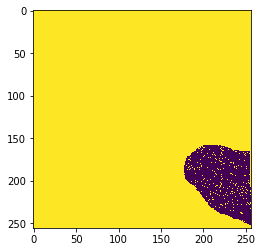

In [5]:
plt.imshow(mask_images[20])

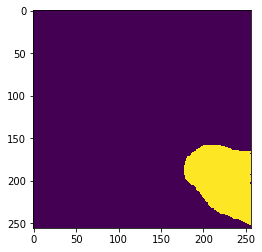

In [6]:
plt.imshow(~binaries[20])

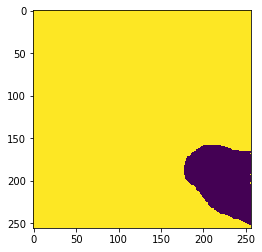

In [7]:
plt.imshow(binaries[20])

In [8]:
np.count_nonzero(binaries[20]),np.count_nonzero(binaries[20]==0)

(60235, 5301)

In [9]:
fake_images=[]
mask = []
for file in fake_files:
    try:
        img=imread(fake_path+file)
        mask_img_name = file.split('.')[0]+'.mask.png'
        mask_img=imread(mask_path+mask_img_name)
    except FileNotFoundError:
        print("No file found")
        
    mask.append(mask_img)
    fake_images.append(img)
    
#binarie_mask=[]
#
#for grayscale in mask:
#    blur = cv2.GaussianBlur(grayscale,(5,5),0)
#    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#    binarie_mask.append(th)

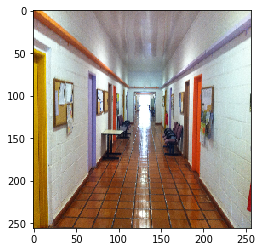

In [29]:
plt.imshow(fake_images[50])

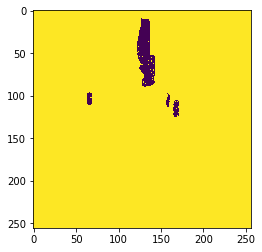

In [11]:
plt.imshow(mask[50])

In [12]:
mask_images_arr = np.array(mask)
fake_images_arr = np.array(fake_images)
type(mask_images_arr),type(fake_images_arr)

(numpy.ndarray, numpy.ndarray)

In [13]:
fake_images_arr.shape,mask_images_arr.shape

((442, 256, 256, 3), (442, 256, 256))

In [15]:
%%time
if not os.path.exists(path+"elaimgs"):
    os.makedirs(path+"elaimgs")
 #os.makedirs("fake_data/images")
from PIL import Image, ImageChops, ImageEnhance
#os.makedirs("fake_data/ela95")
for file in (os.listdir(fake_path)):
    filename = fake_path+"/{}".format(file)
    resaved = '.resaved.jpg'
    ela = path+"elaimgs/{}".format(file)
    im = Image.open(filename).convert("RGB")
    im.save(resaved, 'JPEG', quality=98)
    resaved_im = Image.open(resaved)
    ela_im = ImageChops.difference(im, resaved_im)
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    scale = 255.0/max_diff
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    ela_im.save(ela)
print("DONE Converting to ELA!")

DONE Converting to ELA!
CPU times: user 21.4 s, sys: 276 ms, total: 21.7 s
Wall time: 21.7 s


In [16]:
ela_path = "./dataset-dist/phase-01/training/elaimgs/"
ela_files = os.listdir(ela_path)
ela_images=[]
mask = []
for file in ela_files:
    try:
        img=imread(ela_path+file)
        mask_img_name = file.split('.')[0]+'.mask.png'
        mask_img=imread(mask_path+mask_img_name)
    except FileNotFoundError:
        print("No file found")
        
    mask.append(mask_img)
    ela_images.append(img)

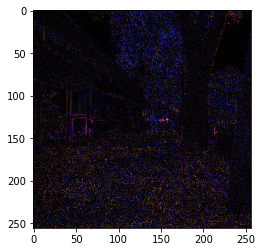

In [20]:
plt.imshow(ela_images[30])

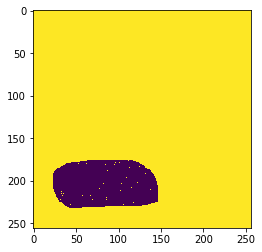

In [21]:
plt.imshow(mask[30])

In [22]:
mask_images_arr = np.array(mask)
ela_images_arr = np.array(ela_images)
type(mask_images_arr),type(ela_images_arr)

(numpy.ndarray, numpy.ndarray)

In [23]:
if K.image_data_format() == 'channels_first':
    ela_images_arr = ela_images_arr.reshape(ela_images_arr.shape[0], 3, 256, 256)
    mask_images_arr = mask_images_arr.reshape(mask_images_arr.shape[0], 1, 256, 256)
    input_shape = (1, 128, 128)
else:
    ela_images_arr = ela_images_arr.reshape(ela_images_arr.shape[0], 256, 256, 3)
    mask_images_arr = mask_images_arr.reshape(mask_images_arr.shape[0], 256, 256, 1)
    input_shape = (128, 128, 1)

In [24]:
X = ela_images_arr.astype('float32')
y = mask_images_arr.astype('float32')

# Normalizing the data
X /= 255
y /= 255

print('X shape:', X.shape)
print('y shape:', y.shape)
print(X.shape[0], 'train samples')
print(y.shape[0], 'labels')

X shape: (442, 256, 256, 3)
y shape: (442, 256, 256, 1)
442 train samples
442 labels


In [30]:
y[0][:,:,0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [31]:
np.count_nonzero(y[0][:,:,0]),np.count_nonzero(y[0][:,:,0]==0)

(64328, 1208)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [33]:
# https://stackoverflow.com/questions/51844995/how-do-i-implement-a-loss-function-intersection-over-union-for-a-sequential-mo
def iou(true, pred):
    intersection = true * pred
    notTrue = 1 - true
    union = true + (notTrue * pred)
    return K.sum(intersection)/K.sum(union)

def iou_metric(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + smooth)

In [60]:
'''def srm_filter(shape, dtype=None):
    arr = np.array([[[ 0,  0,  0,  0,  0],
        [ 0,  -1/4,  2/4,  -1/4,  0],
        [ 0,  2/4,  -4/4,  2/4,  0],
        [ 0,  -1/4,  2/4,  -1/4,  0],
        [ 0,  0,  0,  0,  0]],
       [[ -1/12,  2/12,  -2/12,  2/12,  -1/12],
        [ 2/12,  -6/12,  8/12,  -6/12,  2/12],
        [ -2/12,  8/12,  -12/12,  8/12,  -2/12],
        [ 2/12,  -6/12,  8/12,  -6/12,  2/12],
        [ -1/12,  2/12,  -2/12,  2/12,  -1/12]],
       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  1/2,  -2/2,  1/2,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]]],np.float32)
    #print(shape)
    arr =arr.reshape(shape)
    #print(arr.shape)
    return arr


def conv2d_block_srm(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""

    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

# the trainable parameter is used by the parent class of all layers (which is called Layer)
# and makes sure that the parameters of that layer are not included in the gradient as trainable parameters.

def get_unet_srm(input_img, n_filters = 16, dropout = 0.1, batchnorm = True,count=0):
    """Function to define the UNET Model"""
    x = Conv2D(filters = 1, kernel_size = (5,5), kernel_initializer = srm_filter, padding = 'same',trainable=False)(input_img)
    # Contracting Path
    c1 = conv2d_block_srm(x, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block_srm(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block_srm(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block_srm(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block_srm(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block_srm(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block_srm(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block_srm(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    #c9 = conv2d_block(u9, 3, kernel_size = 3, batchnorm = batchnorm)
    c9 = conv2d_block_srm(u9, 3, kernel_size = 3, batchnorm = batchnorm)
    outputs = Conv2D(1, (3, 3),padding='same',activation='sigmoid')(c9)
    model_srm = Model(inputs=[input_img], outputs=[outputs])
    #outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    #model = Model(inputs=[input_img], outputs=[outputs])
    return model_srm'''

In [37]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x


def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, 3, kernel_size = 3, batchnorm = batchnorm)
    outputs = Conv2D(1, (3, 3),padding='same',activation='sigmoid')(c9)
    #model_reg = Model(inputs=[input_img], outputs=[outputs])
    #outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    #model = Model(inputs=[input_img], outputs=[outputs])
    return outputs

In [36]:
'''input_img = Input((256, 256, 3), name='img')

model_reg = get_unet(input_img, n_filters=16, dropout=0.15, batchnorm=True)
#model_srm = get_unet_srm(input_img, n_filters=16, dropout=0.25, batchnorm=True)

a = Input(shape=(256, 256, 3))
#b = Input(shape=(256, 256, 3))

out_a = model_reg(a)
#out_b = model_srm(b)

#concatenated = concatenate([out_a, out_b])  # keras.layers.concatenate()
#outputs = Conv2D(1, (3, 3), padding='same',activation='sigmoid')(concatenated)
outputs = Conv2D(1, (3, 3), padding='same',activation='sigmoid')(model_reg)

#model = Model([a,b], outputs)
model = Model(a, outputs)'''


In [38]:
input_img = Input((256, 256, 3), name='img')
outputs = get_unet(input_img, n_filters=16, dropout=0.15, batchnorm=True)
model = Model(inputs=[input_img], outputs=[outputs])
model.compile(optimizer=optimizers.Adam(), loss="binary_crossentropy", metrics=[iou_metric])

In [39]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 256, 256, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 256, 256, 16) 64          conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_19 (Activation)      (None, 256, 256, 16) 0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
conv2d_22 

In [40]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-seg_iou_0.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [42]:
batch_size = 32
epochs = 10
results = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks,\
                  validation_data=(X_test, y_test))

Train on 375 samples, validate on 67 samples
Epoch 1/10
375/375 [==============================] - 159s 423ms/step - loss: 0.7445 - iou_metric: 0.4714 - val_loss: 2.0229 - val_iou_metric: 0.4172

Epoch 00001: val_loss improved from inf to 2.02291, saving model to model-seg_iou_0.h5
Epoch 2/10
375/375 [==============================] - 138s 368ms/step - loss: 0.6726 - iou_metric: 0.4969 - val_loss: 2.4445 - val_iou_metric: 0.3818

Epoch 00002: val_loss did not improve from 2.02291
Epoch 3/10
375/375 [==============================] - 139s 370ms/step - loss: 0.6306 - iou_metric: 0.5213 - val_loss: 1.2381 - val_iou_metric: 0.4937

Epoch 00003: val_loss improved from 2.02291 to 1.23815, saving model to model-seg_iou_0.h5
Epoch 4/10
375/375 [==============================] - 139s 371ms/step - loss: 0.5885 - iou_metric: 0.5468 - val_loss: 0.8082 - val_iou_metric: 0.5145

Epoch 00004: val_loss improved from 1.23815 to 0.80820, saving model to model-seg_iou_0.h5
Epoch 5/10
375/375 [===========

In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test iou:', score[1])

Test loss: 0.31567637377710484
Test iou: 0.7485295685369577


In [46]:
model.save_weights("model_seg_256_0.h5")

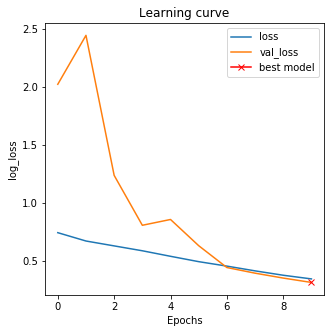

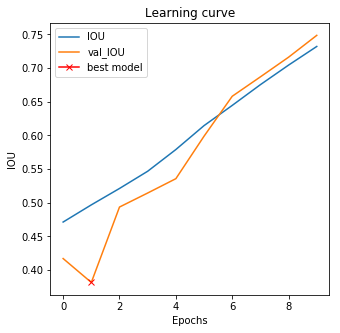

In [47]:
plt.figure(figsize=(5,5))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

plt.figure(figsize=(5,5))
plt.title("Learning curve")
plt.plot(results.history["iou_metric"], label="IOU")
plt.plot(results.history["val_iou_metric"], label="val_IOU")
plt.plot( np.argmin(results.history["val_iou_metric"]), np.min(results.history["val_iou_metric"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("IOU")
plt.legend();

In [50]:
# load the best model
model.load_weights('model-seg_iou_0.h5')
# Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate(X_test, y_test, verbose=1)

67/67 [==============================] - 8s 121ms/step


[0.31567637377710484, 0.7485295685369577]

In [51]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

67/67 [==============================] - 8s 121ms/step


In [76]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    fig, ax = plt.subplots(1, 4, figsize=(20, 25))
    ax[0].imshow(X[ix])
    ax[0].set_title('original')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('mask')

    ax[2].imshow(preds[ix][:,:,0],cmap='Greys_r')
    ax[2].set_title(' Predicted')
    
    ax[3].imshow(preds[ix].squeeze())
    ax[3].set_title(' Predicted')
    


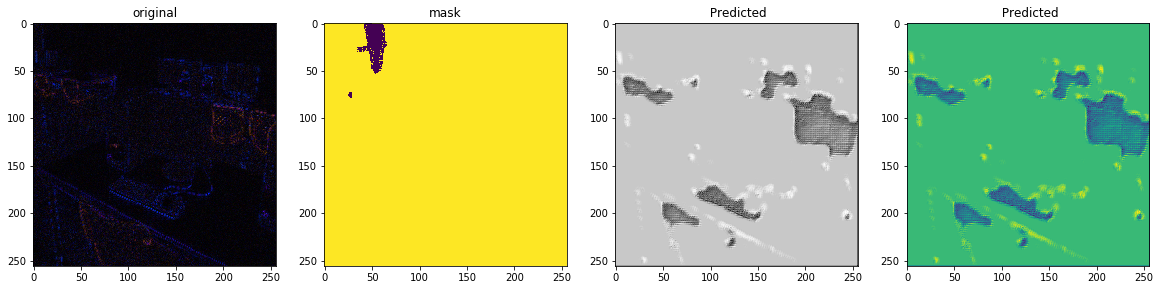

In [79]:
# Check if training data looks all right
plot_sample(X_train, y_train, preds_train, preds_train_t, ix=20)

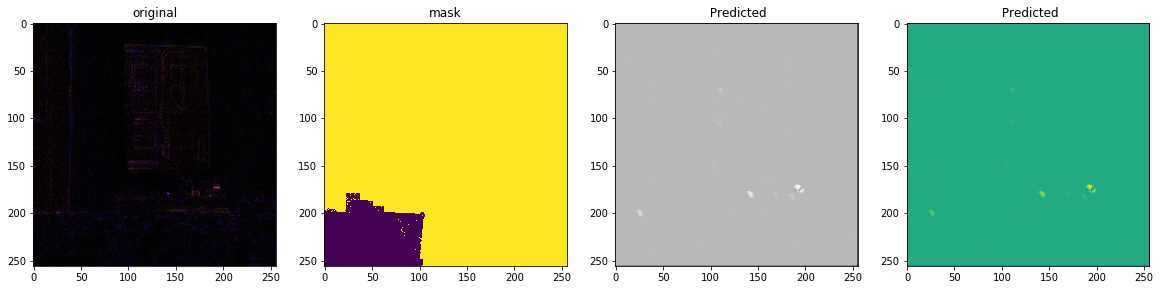

In [54]:
# Check if valid data looks all right
plot_sample(X_test, y_test, preds_val, preds_val_t, ix=13)

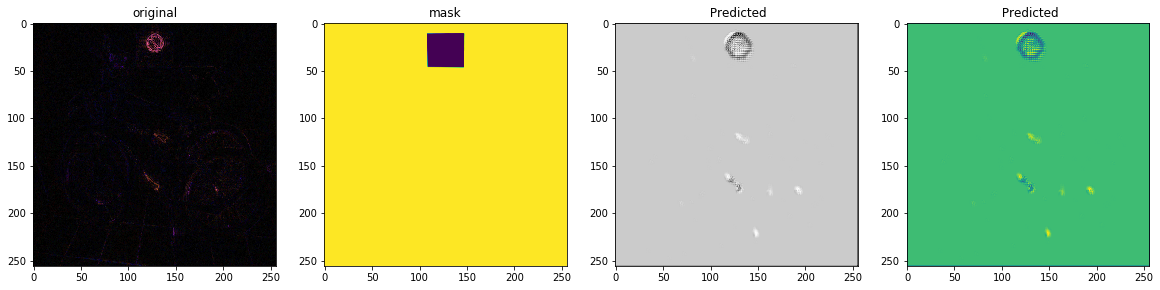

In [55]:
plot_sample(X_test, y_test, preds_val, preds_val_t, ix=55)

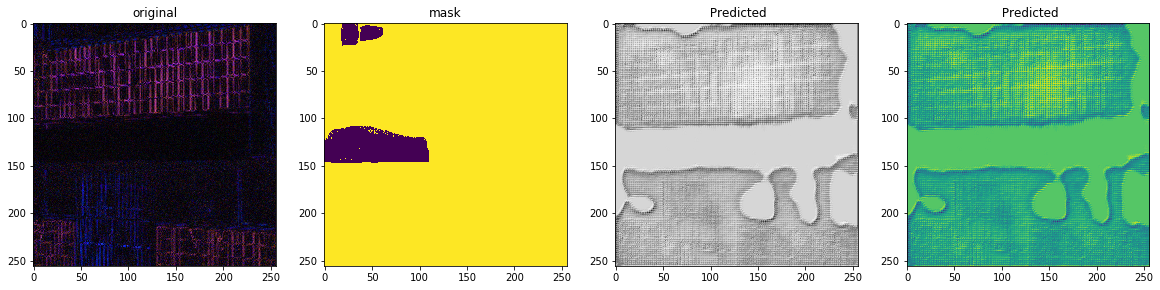

In [70]:
plot_sample(X_test, y_test, preds_val, preds_val_t, ix=10)

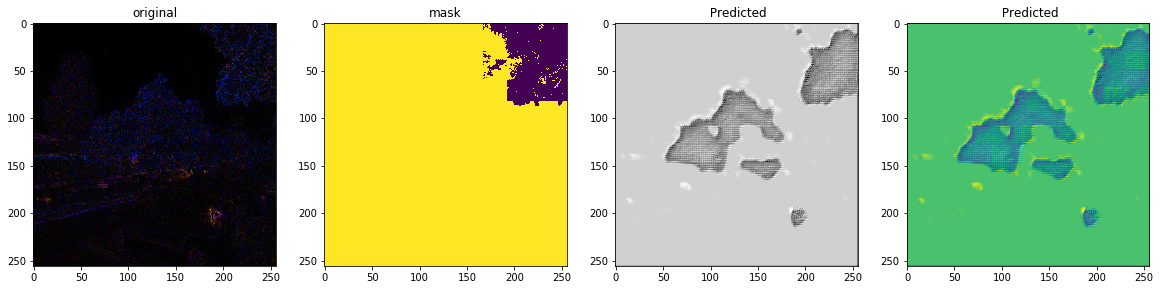

In [57]:
plot_sample(X_test, y_test, preds_val, preds_val_t, ix=33)

In [93]:
del model_1

In [94]:
input_img = Input((256, 256, 3), name='img')
outputs = get_unet(input_img, n_filters=16, dropout=0.15, batchnorm=True)
model_1 = Model(inputs=[input_img], outputs=[outputs])
model_1.compile(optimizer=optimizers.Adam(), loss="binary_crossentropy", metrics=[iou_metric])

In [95]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-seg_iou_1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [97]:

datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect')

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [98]:
epochs=15
nb_train_samples = len(X_train)
nb_validation_samples=len(X_test)
# fits the model on batches with real-time data augmentation:
results=model_1.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,validation_data=(X_test, y_test),
                           validation_steps=nb_validation_samples // batch_size,callbacks=callbacks)

Epoch 1/15
11/11 [==============================] - 147s 13s/step - loss: 0.6505 - iou_metric: 0.5229 - val_loss: 3.2684 - val_iou_metric: 0.4878

Epoch 00001: val_loss improved from inf to 3.26842, saving model to model-seg_iou_1.h5
Epoch 2/15
11/11 [==============================] - 130s 12s/step - loss: 0.5512 - iou_metric: 0.5760 - val_loss: 0.7044 - val_iou_metric: 0.6489

Epoch 00002: val_loss improved from 3.26842 to 0.70435, saving model to model-seg_iou_1.h5
Epoch 3/15
11/11 [==============================] - 131s 12s/step - loss: 0.4871 - iou_metric: 0.6158 - val_loss: 0.8035 - val_iou_metric: 0.6976

Epoch 00003: val_loss did not improve from 0.70435
Epoch 4/15
11/11 [==============================] - 130s 12s/step - loss: 0.4420 - iou_metric: 0.6482 - val_loss: 0.3245 - val_iou_metric: 0.7544

Epoch 00004: val_loss improved from 0.70435 to 0.32454, saving model to model-seg_iou_1.h5
Epoch 5/15
11/11 [==============================] - 130s 12s/step - loss: 0.4026 - iou_metri

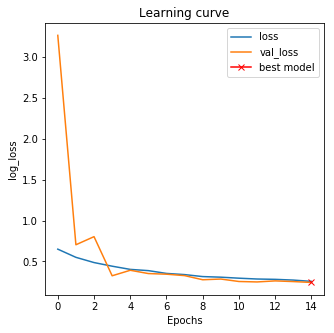

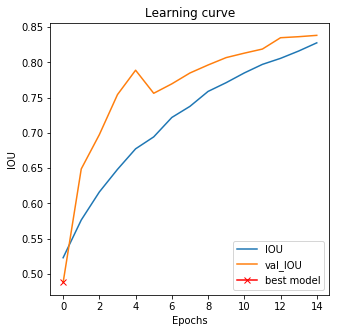

In [99]:
plt.figure(figsize=(5,5))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

plt.figure(figsize=(5,5))
plt.title("Learning curve")
plt.plot(results.history["iou_metric"], label="IOU")
plt.plot(results.history["val_iou_metric"], label="val_IOU")
plt.plot( np.argmin(results.history["val_iou_metric"]), np.min(results.history["val_iou_metric"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("IOU")
plt.legend();

In [100]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test iou:', score[1])

Test loss: 0.24285428559602196
Test iou: 0.8384754141764854


In [101]:
# load the best model
model_1.load_weights('model-seg_iou_1.h5')
# Evaluate on validation set (this must be equals to the best log_loss)
model_1.evaluate(X_test, y_test, verbose=1)

# Predict on train, val and test
preds_train = model_1.predict(X_train, verbose=1)
preds_val = model_1.predict(X_test, verbose=1)

67/67 [==============================] - 8s 123ms/step


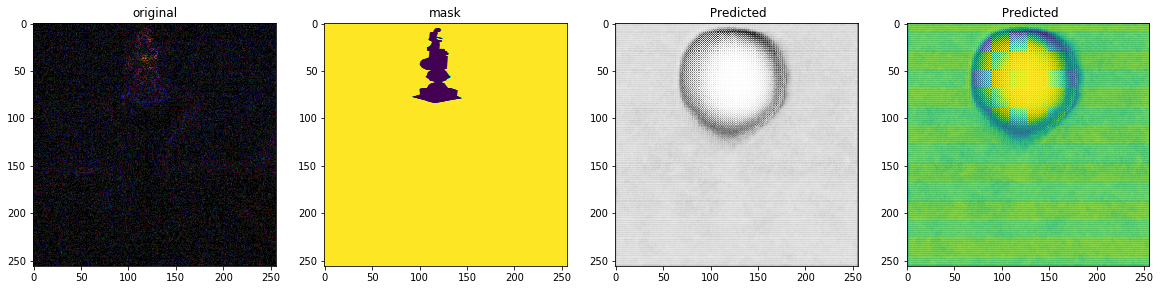

In [106]:
plot_sample(X_test, y_test, preds_val, preds_val_t, ix=7)

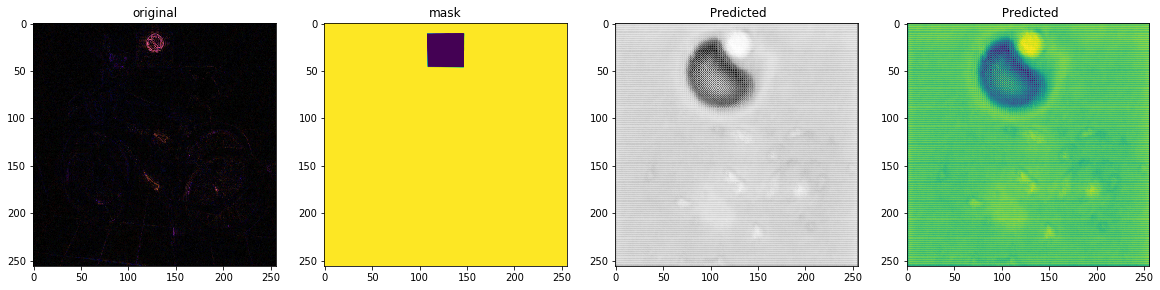

In [103]:
plot_sample(X_test, y_test, preds_val, preds_val_t, ix=55)

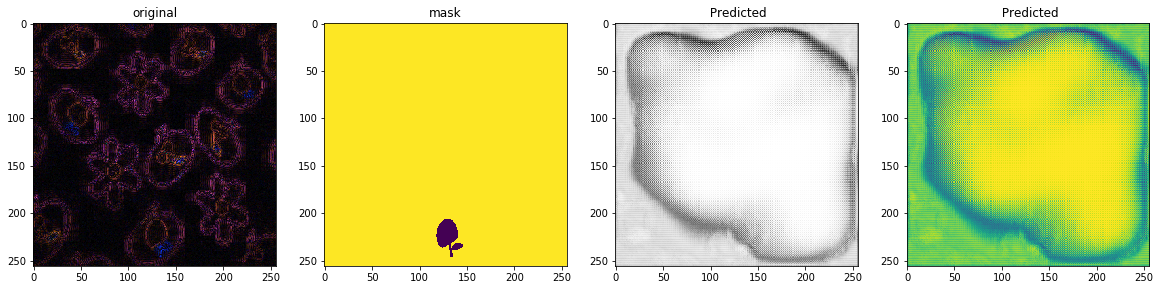

In [114]:
# Check if training data looks all right
plot_sample(X_train, y_train, preds_train, preds_train_t, ix=148)